<a href="https://colab.research.google.com/github/financieras/saturdays_ai/blob/main/ML_S1_Intro_challenge_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/financieras/saturdays_ai/blob/main/img/logo_saturdays_madrid.jpg?raw=1" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 1 Challenge - Bank Classifier

Las campañas de marketing de los bancos dependen de los datos de los clientes. La cantidad de datos que manejan los bancos es tan grande, que es imposible que un analista de datos saque el máximo partido a esta información de modo que pueda ser útil de forma realmente efectiva en el proceso de toma de decisiones.

Aquí es donde los modelos de aprendizaje automático están ayudando a aumentar de forma drástica el mejor desempeño de estas campañas al permitir encontrar patrones en los datos que de otro modo pasarían desapercibidos para los analistas.

## Dataset

El conjunto de datos con el que vamos a trabajar en este challenge está relacionado con una campaña de marketing directo de una institución bancaria portuguesa. Durante la campaña, basada en llamadas telefónicas, a menudo se ha requerido **más de un contacto con el mismo cliente** para ofrecerle la contratación de un depósito bancario.

Nuestro objetivo es predecir si el cliente se suscribirá a un **depósito a plazo**, analizando y preprocesando los datos. Esos datos se utilizarán después para  construir un modelo de clasificación utilizando el algoritmo k-NN.

Las variables de entrada o características son:
* `age` - Edad del cliente.
* `job` - Tipo de trabajo que desempeña el cliente.
* `marital` - Estado civil.
* `education` - Nivel educativo.
* `default` - Indica si tiene crédito en mora.
* `balance` - Balance del saldo del cliente.
* `housing` - Indica si tiene contratada una hipoteca.
* `loan` - Indica si tiene un crédito personal.
* `contact` -  Forma en la que se ha contactado con el cliente.
* `day` - Día del mes en el que se realizó el último contacto.
* `month` - Mes del año en el que se realizó el último contacto.
* `duration` - Duración del último contacto, en segundos. **¡Importante!** Este atributo afecta en gran medida la variable de salida (por ejemplo, si `duration= 0`, entonces `y='no'`). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce `y`. Por lo tanto, esta variable de entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista, ya que si no estaríamos ante lo que se conoce como fuga de datos _(data lekeage)_.
* `campaign` - Número de veces que se le ha contactado en esta campaña.
* `pdays` -  Número de días que han pasado después de que el cliente fue contactado por última vez desde una campaña anterior, `pdays=-1` si no se le ha contactado previamente.
* `previous` - Número de contactos realizados antes de esta campaña y para este cliente.
* `poutcome` - Resultado de la campaña de marketing anterior.

La variable que queremos predecir es `y`, la cual indica si el cliente finalmente ha suscrito un depósito a plazo o no.

Puedes encontrar más información de este dataset en [UCI Machine Learning Repository - Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Importar librerías

A continuación, te dejamos indicadas las librerías que creemos que vas a necesitar importar para completar el _challenge_, pero puedes importar las que creas necesarias.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Cargar los datos

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de la campaña de marketing. ¡Ojo con el separador!**

In [2]:
# Montamos la conexión con mi drive ya que el archivo lo subí a mi Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# La ruta se puede copiar con clic derecho del ratón sobre el archivo
ruta = '/content/drive/MyDrive/saturdays_ai/bank.csv'

# Carga el dataset con un separador específico
data = pd.read_csv(ruta, sep=';')

## Exploración general del dataset

**Muestra las 10 primeras filas del conjunto de datos.**

In [4]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Imprime el número de filas (registros u observaciones) y columnas (variables o características) del conjunto de datos.**

In [5]:
data.shape

(45211, 17)

In [6]:
filas, columnas = data.shape
print(f"El conjunto de datos tiene {filas} filas y {columnas} columnas.")

El conjunto de datos tiene 45211 filas y 17 columnas.


**Muestra la información general del dataset.**

In [7]:
# Muestra la información técnica detallada
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Muestra el número de valores únicos en cada columna.**

In [8]:
# Muestra el conteo de valores únicos por columna
# Es lo que en estadística llamamos cardinalidad
print(data.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


**Comprueba la existencia de valores nulos en el dataset.**

In [9]:
# Comprueba cuántos valores nulos hay por cada columna
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Muestra una descripción estadística básica del dataset.**

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Según su tipo, cuáles de las variables de entrada son categóricas y cuáles numéricas.**

In [11]:
# Separar columnas por tipo de dato
numericas = data.select_dtypes(include=['number']).columns.tolist()
categoricas = data.select_dtypes(include=['object']).columns.tolist()

print(f"Variables Numéricas: {numericas}")
print(f"Variables Categóricas: {categoricas}")

Variables Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [12]:
# Otro método basado en data.info()

# 1. Filtramos las columnas que son números (int64)
columnas_numericas = data.select_dtypes(include=['int64']).columns.tolist()

# 2. Filtramos las columnas que son texto/categorías (object)
columnas_categoricas = data.select_dtypes(include=['object']).columns.tolist()

# 3. Imprimimos los resultados
print("Variables Numéricas (int64):")
print(columnas_numericas)

print("\nVariables Categóricas (object):")
print(columnas_categoricas)

Variables Numéricas (int64):
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Variables Categóricas (object):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [13]:
# Una variante del método anterior usando una List Comprehension

# 1. Lista de variables numéricas (int64)
numericas = [col for col in data.columns if data[col].dtype == 'int64']

# 2. Lista de variables categóricas (object)
categoricas = [col for col in data.columns if data[col].dtype == 'object']

print(f"Numéricas: {numericas}")
print(f"Categorías: {categoricas}")

Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorías: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


**Muestras los posibles valores de cada una de las variables categóricas y sus valores absolutos.**

In [14]:
for col in columnas_categoricas:
    print(f"--- Variable: {col} ---")

    # Calculamos los valores una sola vez por columna
    absolutos = data[col].value_counts()
    porcentajes = data[col].value_counts(normalize=True)

    # Iteramos sobre el índice de los resultados (los nombres de las categorías)
    for nombre_cat in absolutos.index:
        abs_val = absolutos[nombre_cat]
        pct_val = porcentajes[nombre_cat]
        print(f"{nombre_cat:<15} | {abs_val:>5} | {pct_val:>6.1%}")

    print("\n" + "-"*35 + "\n")

--- Variable: job ---
blue-collar     |  9732 |  21.5%
management      |  9458 |  20.9%
technician      |  7597 |  16.8%
admin.          |  5171 |  11.4%
services        |  4154 |   9.2%
retired         |  2264 |   5.0%
self-employed   |  1579 |   3.5%
entrepreneur    |  1487 |   3.3%
unemployed      |  1303 |   2.9%
housemaid       |  1240 |   2.7%
student         |   938 |   2.1%
unknown         |   288 |   0.6%

-----------------------------------

--- Variable: marital ---
married         | 27214 |  60.2%
single          | 12790 |  28.3%
divorced        |  5207 |  11.5%

-----------------------------------

--- Variable: education ---
secondary       | 23202 |  51.3%
tertiary        | 13301 |  29.4%
primary         |  6851 |  15.2%
unknown         |  1857 |   4.1%

-----------------------------------

--- Variable: default ---
no              | 44396 |  98.2%
yes             |   815 |   1.8%

-----------------------------------

--- Variable: housing ---
yes             | 25130 |  

## Análisis exploratorio de la variable objetivo

**La variable objetivo es aquiella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado `bank_data` que sea una copia del original.**

In [15]:
# Creamos la copia profunda del DataFrame
bank_data = data.copy()

**Cambia el nombre de la variable objetivo `y` por `deposit`.**

In [16]:
# Cambiamos el nombre de la columna 'y' por 'deposit'
bank_data = bank_data.rename(columns={'y': 'deposit'})

# Verificamos el cambio viendo las últimas columnas
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Cambia los valores de la variable `deposit` de `yes/no` por `1/0` respectivamente.**

In [17]:
# Mapeamos 'yes' a 1 y 'no' a 0
bank_data['deposit'] = bank_data['deposit'].map({'yes': 1, 'no': 0})

# Verificamos los primeros registros para confirmar el cambio
print(bank_data['deposit'].head())

0    0
1    0
2    0
3    0
4    0
Name: deposit, dtype: int64


Si por algún motivo hubiera un valor que no sea ni "yes" ni "no", Pandas lo convertiría en `NaN` (nulo), lo cual ayudaría a detectar errores de limpieza.

¿Cómo verificar que todo salió bien?  
Podemos usar de nuevo el conteo que hicimos antes para ver que ahora los valores son numéricos:

In [18]:
# Ver el conteo de los nuevos valores (1 y 0)
print(bank_data['deposit'].value_counts())

# También puedes ver el tipo de dato (debería ser int64)
print(f"Nuevo tipo de dato: {bank_data['deposit'].dtype}")

deposit
0    39922
1     5289
Name: count, dtype: int64
Nuevo tipo de dato: int64


**Visualiza la variable objetivo con un countplot. ¿Qué conclusión sacas?**

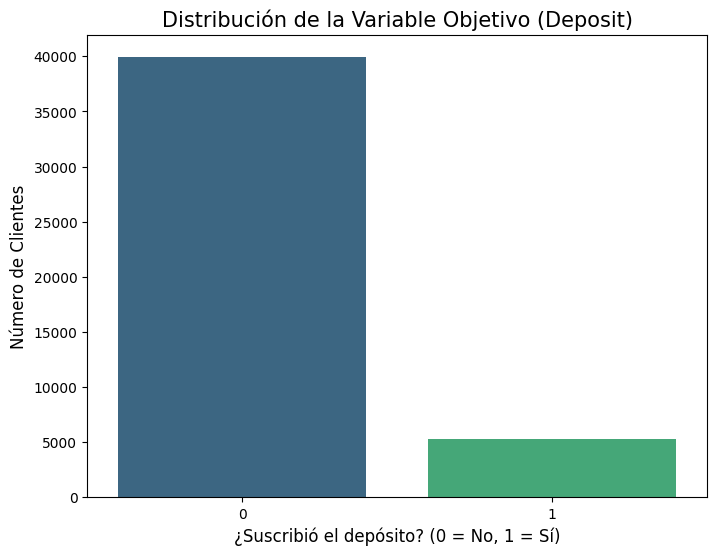

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Asignamos 'deposit' a hue y quitamos la leyenda para que se vea igual que antes
sns.countplot(x='deposit', data=bank_data, hue='deposit', palette='viridis', legend=False)

plt.title('Distribución de la Variable Objetivo (Deposit)', fontsize=15)
plt.xlabel('¿Suscribió el depósito? (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

plt.show()

## Análisis exploratorio de las variables predictoras

**Muestra la distribución por edades de los clientes. Usa el tipo de visualización que quieras.**

Para visualizar la edad, lo ideal es utilizar un Histograma combinado con una curva de densidad (KDE). Esto nos permite ver no solo cuántas personas hay en cada rango de edad, sino también la "forma" general de la distribución (si hay muchos jóvenes, si se concentra en la mediana edad, etc.).

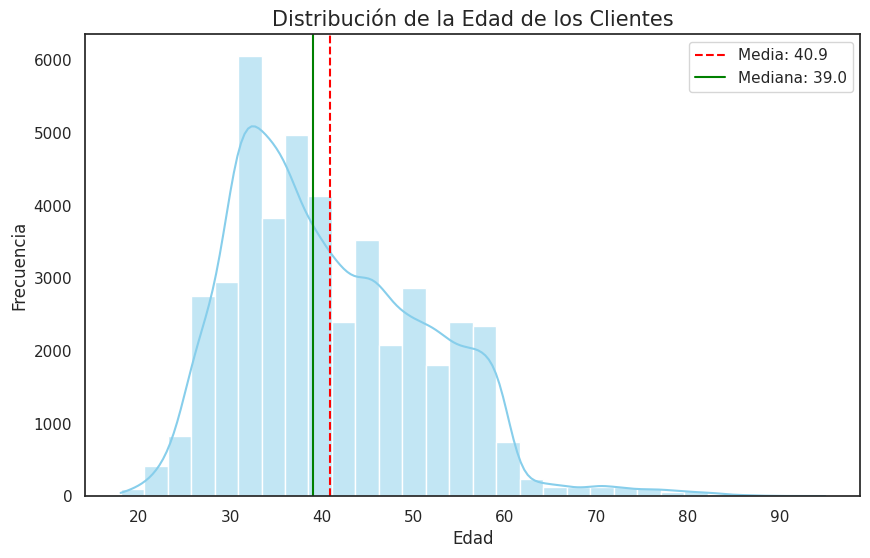

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo
sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

# Creamos un histograma con curva de densidad (KDE)
sns.histplot(data=bank_data, x='age', kde=True, color='skyblue', bins=30)

# Añadimos líneas para la media y la mediana para enriquecer el análisis
plt.axvline(bank_data['age'].mean(), color='red', linestyle='--', label=f"Media: {bank_data['age'].mean():.1f}")
plt.axvline(bank_data['age'].median(), color='green', linestyle='-', label=f"Mediana: {bank_data['age'].median():.1f}")

plt.title('Distribución de la Edad de los Clientes', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

plt.show()

**Crea un barplot para cada una de las variables predictoras categóricas del dataset en función de la variable de salida.**

Para analizar cómo influyen las variables categóricas en la contratación del depósito, lo más efectivo es crear una rejilla de gráficos (subplots). Dado que tenemos 9 variables categóricas (sin contar la variable objetivo deposit), las organizaremos en una cuadrícula de 3x3.Usaremos un barplot que muestre la proporción (media) de éxitos. Como deposit ahora es $0$ y $1$, la media de cada barra representará el porcentaje de personas que contrataron el producto en esa categoría específica.

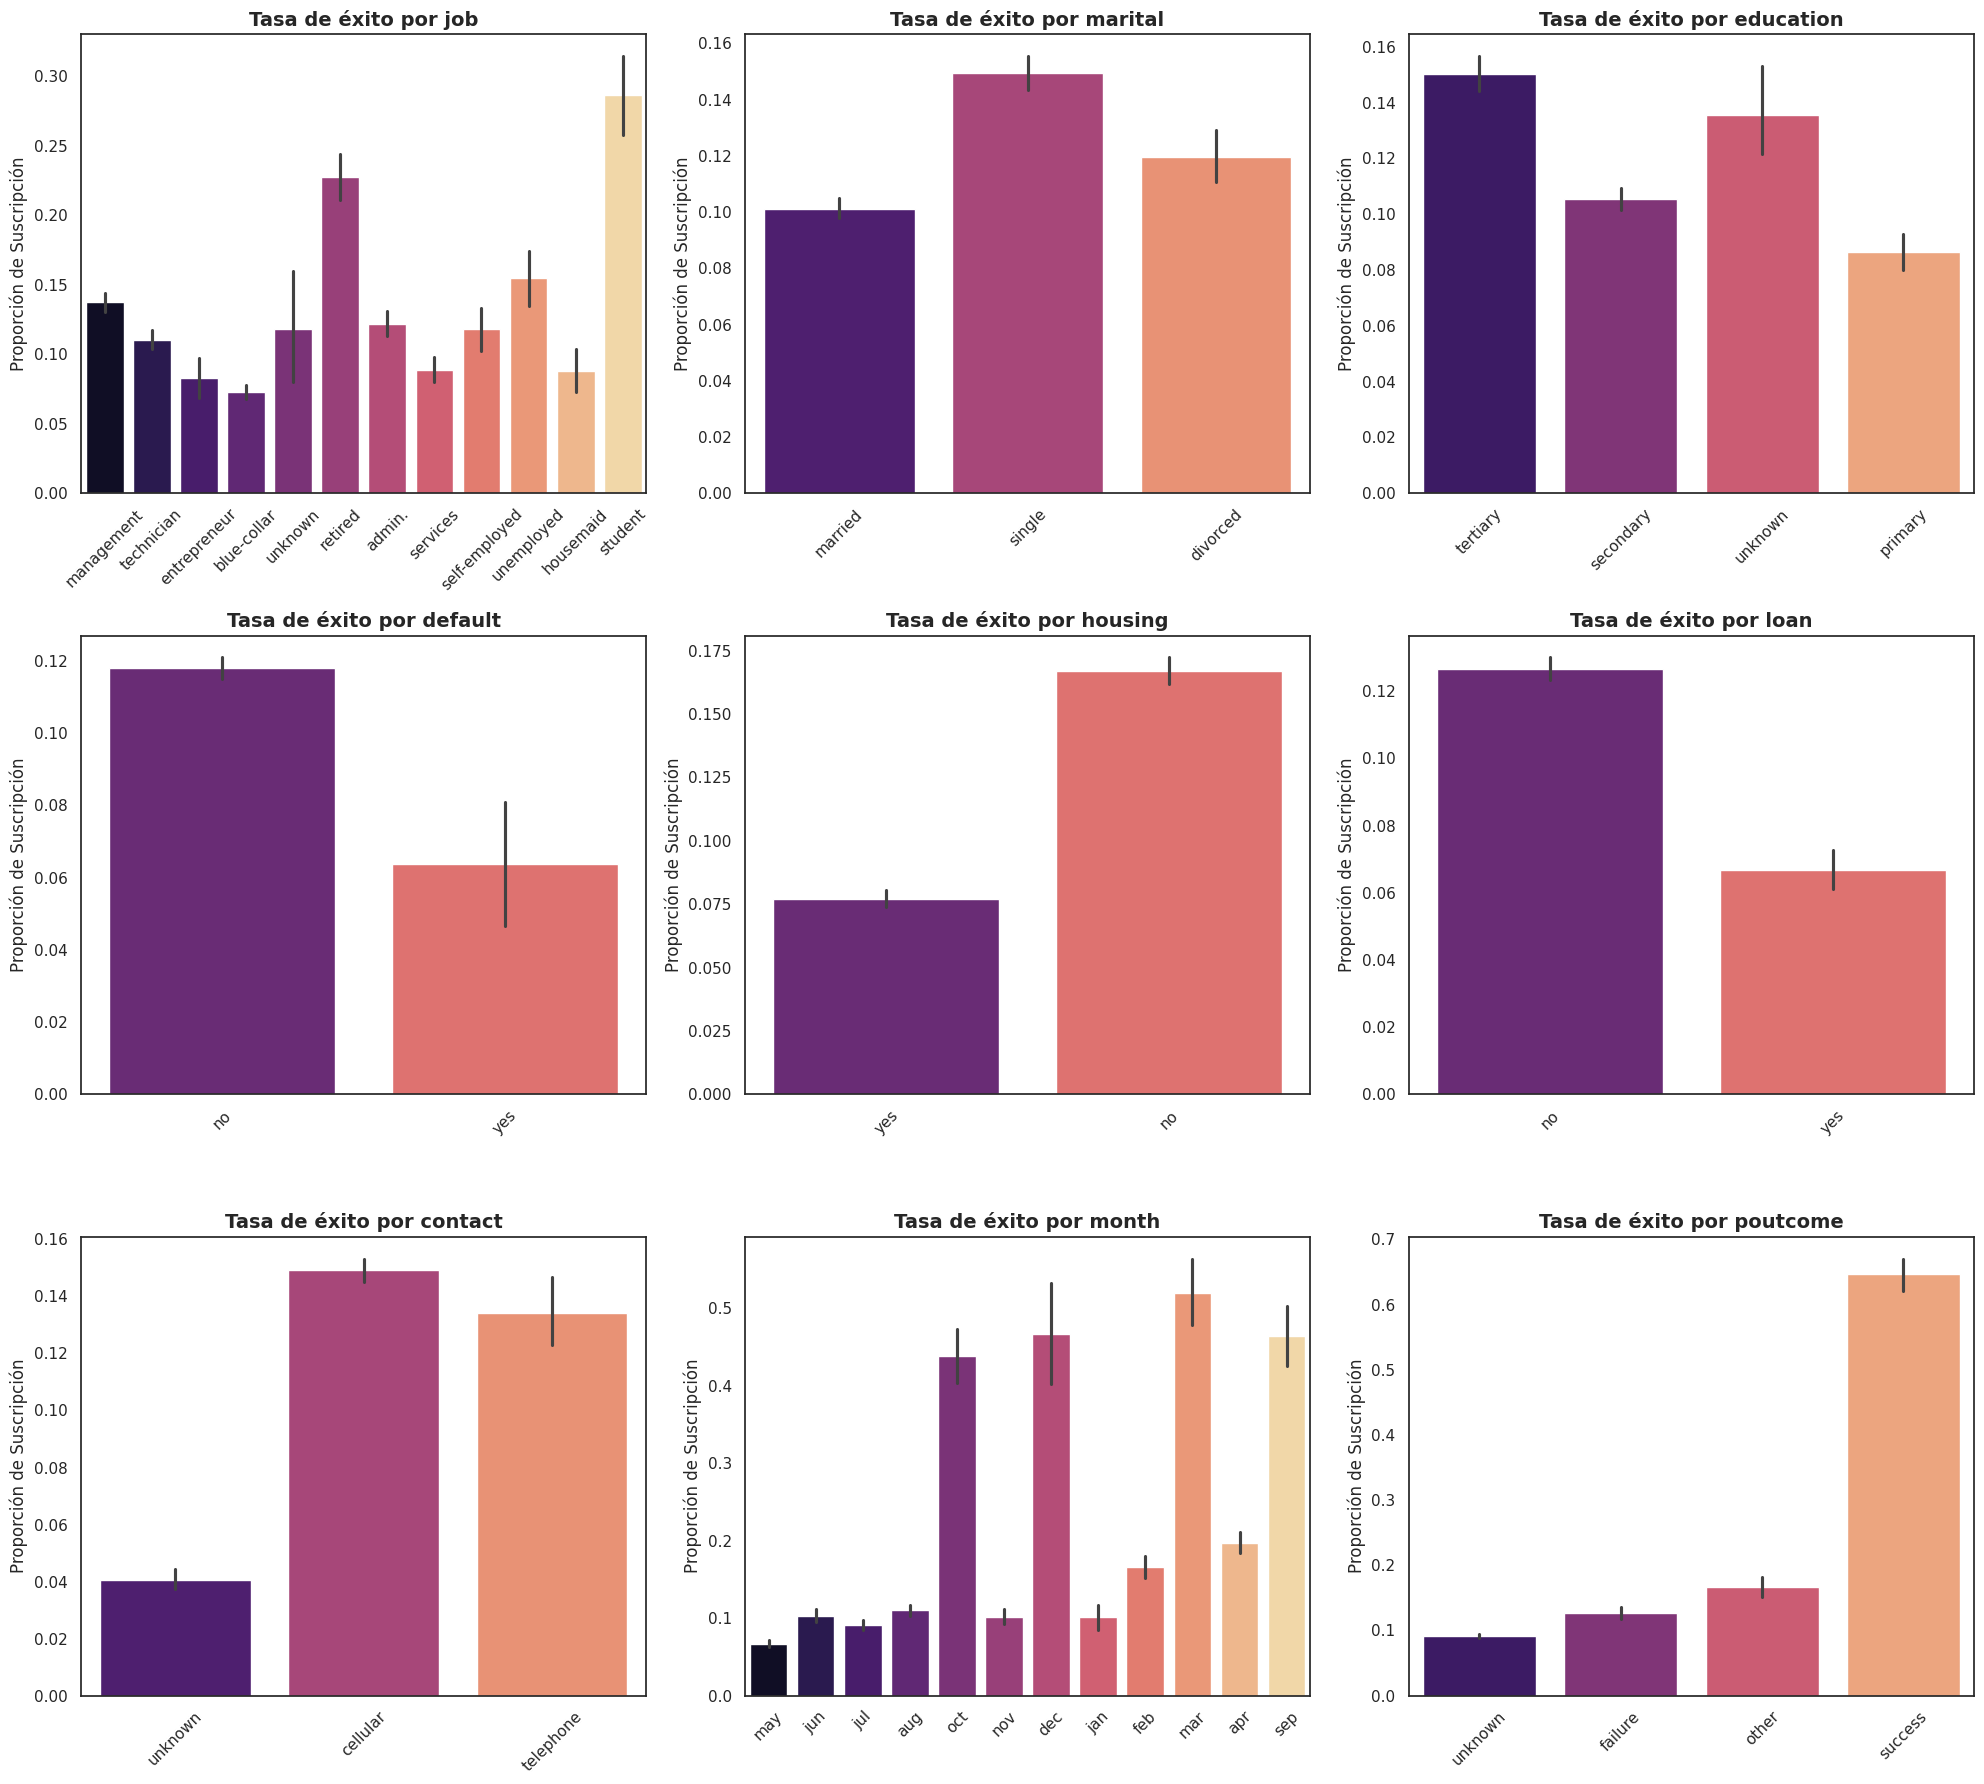

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definimos las variables predictoras categóricas (excluimos 'deposit')
# Usamos bank_data porque es nuestra copia de trabajo
cat_features = [col for col in bank_data.columns if bank_data[col].dtype == 'object' and col != 'deposit']

# 2. Configuramos la rejilla (3 filas x 3 columnas)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flat # Aplanamos para iterar fácilmente

# 3. Iteramos y creamos cada gráfico
for i, col in enumerate(cat_features):
    # Creamos el barplot. La altura de la barra es la media de 'deposit' (tasa de éxito)
    sns.barplot(x=col, y='deposit', data=bank_data, ax=axes[i], palette='magma', hue=col, legend=False)

    axes[i].set_title(f'Tasa de éxito por {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Proporción de Suscripción')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45) # Rotamos etiquetas para que no se solapen

# Ajustamos el diseño para que no se amontonen los títulos
plt.tight_layout()
plt.show()

**Usa un pairplot para mostrar la distribución y las relaciones de las variables numéricas predictoras en base a la variable de salida.**

El pairplot es una herramienta excelente para detectar patrones visuales. Nos mostrará histogramas en la diagonal (distribución individual) y diagramas de dispersión (scatter plots) en el resto de la cuadrícula para ver cómo interactúan las variables entre sí.

Dado que tienes 7 variables numéricas, generar el gráfico con todas ellas puede ser muy lento y dar como resultado imágenes muy pequeñas y difíciles de leer. Lo ideal es seleccionar las más relevantes (como edad, balance, duración y campaña).

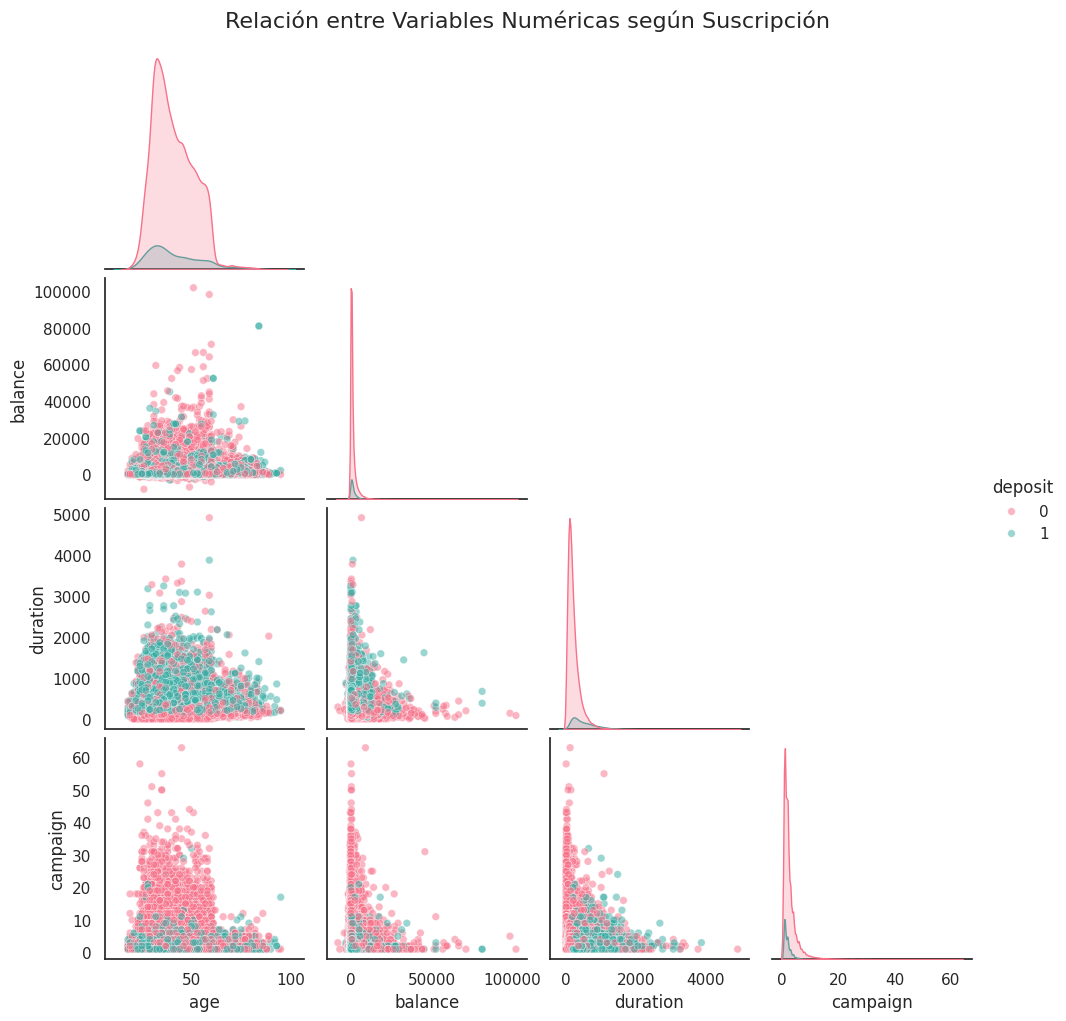

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionamos las variables numéricas más representativas + la variable objetivo
cols_interes = ['age', 'balance', 'duration', 'campaign', 'deposit']

# 2. Creamos el pairplot
# 'hue' diferencia los colores según si contrataron o no el depósito
# 'corner=True' elimina la mitad superior duplicada para que sea más claro
# 'plot_kws' ajusta el tamaño y transparencia de los puntos
g = sns.pairplot(bank_data[cols_interes],
                 hue='deposit',
                 palette='husl',
                 corner=True,
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 30})

g.fig.suptitle('Relación entre Variables Numéricas según Suscripción', fontsize=16, y=1.02)
plt.show()

**Transforma los meses en su correspondiente número, y muestra el conteo antes y después para ver que has realizado la modificación correctamente.**

**Transforma las variables categóricas binarias `default`, `housing` y `loan` en variables numéricas de tipo `0/1`. A continuación, muéstralas para ver que la transformación ha sido correcta.**

**Cuántos clientes NO han sido contactados nunca.**

**De los clientes que fueron contactados previamente, ¿cuántos días han pasado desde que contactaron al primero?**

**Realiza 3 consultas que te parezcan interesantes al conjunto de datos similares a las dos anteriores usando lo que aprendiste en el notebook de práctica. Otro ejemplo: "¿Qué clientes que trabajan como técnicos han contratado un depósito?".**

**Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset e indica qué conclusiones sacas de ellas. Por ejemplo: "Crea un scatterplot con la edad del cliente y el dinero que tiene en la cuenta (`balance`)".**

**Sustituye el valor -1 de `pdays` por un valor grande (por ejemplo 10.000) para que refleje que hace mucho que no se le ha contactado (similar a no haberle contactado nunca).**

**Crea una nueva columna llamada `recent_pdays` que refleje aquellos contactos que son más recientes con los valores mas grandes, y los que nunca se les ha contactado con los valores más pequeños (siempre positivos). Para esto, haz el inverso del valor de `pdays`.**

**Comprueba los valores mínimo y máximo de la variable `recent_pdays`.**

**Puesto que ya no la necesitamos, elimina la columna `pdays`.**

**Dentro de la variable `poutcome` incluye los `other` dentro de los `unknown`, ya que realmente no sabemos qué representan y no parece tener mucho sentido tener ambas separadas. Muestra un conteo de esta variable para ver el resultado.**

**Eliminamos `contact`, ya que no nos aporta información, y la columna `duration` ya que en el enunciado nos advierten que esta información no está realmente disponible a la hora de hacer la predicción y nos haría incurrir en una fuga de datos.**

**Para poder pasarle los datos al algoritmo k-NN necesitamos convertir todas las variables categóricas a numéricas. Para ello vamos a usar un método conocido como _one-hot encoding_, que lo que hace es asignar a cada categoría un vector que contiene `1s` y `0s`, lo que denota la presencia o ausencia de esa característica. Usa la función `get_dummies()` de Pandas.**

**Muestra la matriz de correlación de las variables.**

## División conjuntos de entrenamiento y prueba

Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros `random_state` y `stratify`?**

## Normalización de los datos

Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

**Normaliza los datos de entrenamiento y prueba usando la función `MinMaxScaler()` de la librería Scikit-Learn.**

## Entrenamiento modelo

Vamos a usar el modelo _**k-Nearest Neighbors**_ para crear un clasificador que nos permita predecir a partir de los datos que tenemos si un cliente contratará o no el depósito a plazo como resultado de la campaña de marketing.

**Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona. Prueba diferentes valores de `k`, por ejemplo entre 1 y 20.**

**(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.**

**(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.**

**Entrena de nuevo el clasificador con el `k` que has seleccionado.**

## Realizar predicciones

**Realiza las predicciones para el conjunto de prueba.**

## Evaluación del modelo

**Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.**

**Muestra la matriz de confunsión para el clasificador.**

**Imprime el informe de clasificación. ¿Qué conclusiones sacas?**

**Por último, crea una visualización con la curva ROC y la métrica del área bajo la curva.**

In [20]:
# Calcula el área bajo la curva


In [21]:
# Visualiza el área bajo la curva
